In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ссылка на dataframe: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Колонки и их значения:

- Invoice Id - уникальный номер сделки
- Branch - отделение магазина (А, В или С)
- City - город
- Customer type - тип покупателя (с бонусной картой или без)
- Gender - гендер
- Product line - категория продукции
- Unit price - стоимость каждого товара 
- Quantity - количество купленного товара
- Tax 5% - 5% tax free
- Total - суммарная стоимость купленной продукции
- Date - дата покупки
- Time - время покупки
- Payment - способ оплаты
- cogs - стоимость проданной продукции
- gross margin percentage - процент валовой прибыли
- gross income - валовой доход
- Rating - рейтинг клиентов по их покупательскому опыту (от 1 до 10)

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSuNuf8uyYPXJ8Ek-kkRojq37H6JZXi1GujZoX0cToJLcAKis_dNn-dYWrGgNqtqaeazkITUq9S2nF2/pub?gid=555846043&single=true&output=csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Оценка качества данных

Для начала необходимо проверить данные на наличие пропусков, определить типы данных в колонках.

In [3]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Как видно, в датафрейме отсутвуют пропуски, следовательно, можно продолжать анализ. Теперь взглянем на типы значений в колонках:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Колонки представлены двумя типами: object, float64 и int64, для работы с категориальными переменными удобнее будет переопределить им тип на str.

In [5]:
object_columns = df.select_dtypes(include=object).columns

# Преобразуем тип данных колонок на строковый тип данных
df[object_columns] = df[object_columns].astype(str)

# Изменяем исходный DataFrame 
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   string 
 1   Branch                   1000 non-null   string 
 2   City                     1000 non-null   string 
 3   Customer type            1000 non-null   string 
 4   Gender                   1000 non-null   string 
 5   Product line             1000 non-null   string 
 6   Unit price               1000 non-null   Float64
 7   Quantity                 1000 non-null   Int64  
 8   Tax 5%                   1000 non-null   Float64
 9   Total                    1000 non-null   Float64
 10  Date                     1000 non-null   string 
 11  Time                     1000 non-null   string 
 12  Payment                  1000 non-null   string 
 13  cogs                     1000 non-null   Float64
 14  gross margin percentage  

# Выдвижение гипотез

Проверим следующие предположения:

1. мужчины и женщины в среднем тратят одинаковое количество денег
2. средний чек покупателя с бонусной картой равен чеку покупателя без бонусной карты
3. люди, расплачивающиеся безналично, в среднем тратят больше, чем те, кто платит наличными

# Проверка гипотез

# Гипотеза №1
Начнем с пункта 1:

Нулевая гипотеза (H0): Средний чек мужчин равен среднему чек женщин. Альтернативная гипотеза (H2): средний чек мужчин отличается от среднего чека женщин. Для начала выделим необходимые колонки и проведем вивзуальный анализ:

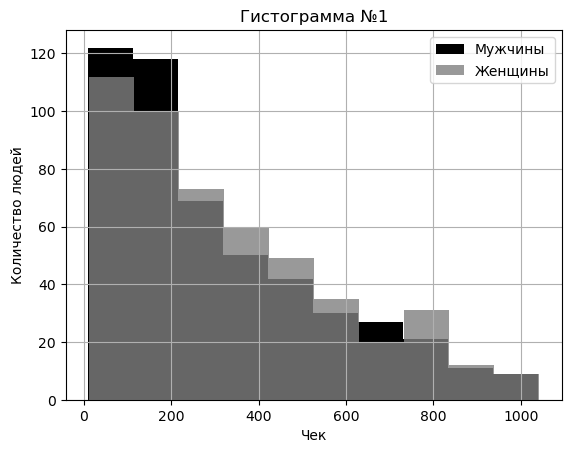

In [6]:
df_1 = df[['Gender', 'Total']]

df_1[df_1['Gender'] == 'Male']['Total'].hist(color='black')
df_1[df_1['Gender'] == 'Female']['Total'].hist(alpha=0.8, color='grey')
plt.xlabel("Чек")
plt.ylabel("Количество людей")
plt.title("Гистограмма №1")
plt.legend(['Мужчины', 'Женщины'])
plt.show()

Оценивая данные визуально, можно предположить, что средний чек у женщин и мужчин действительно примерно равен, однако необходимо провести статистические тесты для строго доказательства. В данном случае воспользуемся t-тестом. Для его проведения неободимо, чтобы переменная:

1. Была непрерывной
2. Имела распределение близкое к нормальному
3. Обладала незначительными различиями в дисперсии между двумя группами наблюдений

Непрерывность очевидна, проверим нормальность распредения, для этого воспользуемся тестом Шапиро-Уилка. Для этого нам нужно большое количество выборок, чтобы убедиться, что среднее значение в них действительно распределено нормально.

Нулевая гипотеза (H0): Распределение данных взято из генеральной совокупности с нормальным распределением.
Альтернативная гипотеза (H1): Распределение данных не является нормальным.

In [7]:
means_male = []
means_female = []
n = 0

while n < 500:
    n += 1
    sample_male = df_1[df_1['Gender'] == "Male"]['Total'].sample(100).mean()
    means_male.append(sample_male)
    sample_female = df_1[df_1['Gender'] == "Female"]['Total'].sample(100).mean()
    means_female.append(sample_female)

from scipy.stats import shapiro

print(f"P-value для мужчин - {shapiro(means_male).pvalue}\nP-value для женщин - {shapiro(means_female).pvalue}")

P-value для мужчин - 0.744779109954834
P-value для женщин - 0.09574587643146515


Показатель p-value незначим (p-value > 0.05), поэтому мы не можем отклонить нулевую гипотезу и считаем, что средние в выборках распределены случайным образом.

Далее нам нужно узнать, равны ли дисперсии по группам. И в зависимости от этого уточнить дополнительный параметр для t-теста. Воспользуемся критерием Левене:

Нулевая гипотеза (H0): Дисперсии (вариации) двух или более групп данных статистически одинаковы (гомогенны).
Альтернативная гипотеза (H1): Дисперсии групп данных статистически различаются (неоднородны).

In [8]:
from scipy.stats import levene

male_total = df_1[df_1['Gender'] == 'Male']['Total']
female_total = df_1[df_1['Gender'] == 'Female']['Total']

f"P-value для критерия Левене = {levene(male_total, female_total).pvalue}"

'P-value для критерия Левене = 0.34154716602764346'

Мы видим, что p-value больше уровня значимости (0.05), следовательно, мы принимаем нулевую гипотезу о равенстве диспресий. Это необходимо отразить в t-тесте.

Нулевая гипотеза (H0): Средние значения двух выборок статистически равны (нет различий между группами).
Альтернативная гипотеза (H1): Средние значения двух выборок 

In [9]:
from scipy.stats import ttest_ind

f"P-value для t-теста = {ttest_ind(list(male_total), list(female_total), equal_var=True).pvalue}"

'P-value для t-теста = 0.11810484577135677'

Так как p-value > 0.05, мы не можем принять нулевую гипотезу о том, что средний чек не различается в зависимости от гендера.

In [10]:
from statistics import mean
f"Средний чек для мужчин - {round(mean(male_total), 2)}, средний чек для женщин - {round(mean(female_total), 2)}"

'Средний чек для мужчин - 310.79, средний чек для женщин - 335.1'

# Гипотеза №2

Далее рассмотрим второе предположение о том, что средний чек покупателя с бонусной картой равен чеку покупателя без бонусной карты

Нулевая гипотеза (H0): средний чек покупателя с бонусной картой равен среднему чеку покупателя без бонусной карты. Альтернативная гипотеза (H1): средний чек покупателя с бонусной картой отличается от среднего чека покупателя без бонусной карты.

Для начала подготовим датафрейм с необходимыми данными:

In [11]:
df_2 = df[['Customer type', 'Total']]
df_2.head()

,Customer type,Total
0,Member,548.9715
1,Normal,80.22
2,Normal,340.5255
3,Member,489.048
4,Normal,634.3785


Вновь начнем с визуализации:

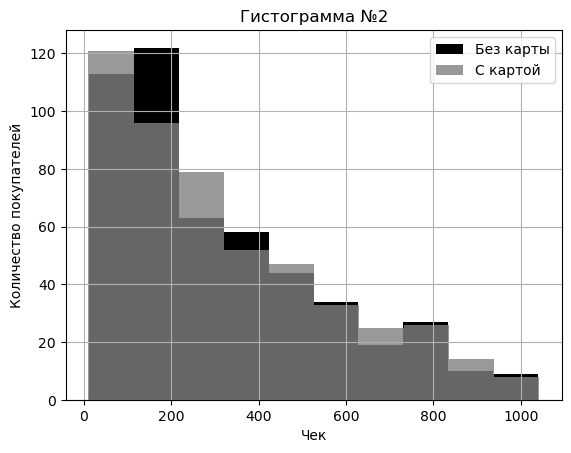

In [12]:
df_2[df_2['Customer type'] == 'Normal']['Total'].hist(color='black')
df_2[df_2['Customer type'] == 'Member']['Total'].hist(alpha=0.8, color='grey')
plt.xlabel("Чек")
plt.ylabel("Количество покупателей")
plt.title("Гистограмма №2")
plt.legend(['Без карты', 'С картой'])
plt.show()

Визуально видно, что траты двух категорий покупателей вполне могут быть примерно равны, проведем статистические тесты.

Вновь необходимо проверить есть ли различия в средних двух выборок - вновь t-тест. Непрерывность переменной очевидна, проверим нормальность распределения и равенство дисперсий:


Тест Шапиро-Уилка:
Нулевая гипотеза (H0): Распределение данных взято из генеральной совокупности с нормальным распределением. Альтернативная гипотеза (H1): Распределение данных не является нормальным.

In [13]:
means_normal = []
means_member = []
n = 0

while n < 500:
    n += 1
    sample_normal = df_2[df_2['Customer type'] == 'Normal']['Total'].sample(100).mean()
    means_normal.append(sample_normal)
    sample_member = df_2[df_2['Customer type'] == 'Member']['Total'].sample(100).mean()
    means_member.append(sample_member)
    
print(f"P-value для покупателей без карты - {shapiro(means_normal).pvalue}\nP-value для покупателей c картой - {shapiro(means_member).pvalue}")    

P-value для покупателей без карты - 0.8255725502967834
P-value для покупателей c картой - 0.7760877013206482


P-value для обеих выборок незначим (p-value > 0.05), следовательно мы принимаем нулевую гипотезу, что средние в выборках распределены случайно.

Далее проверим равенство дисперсий через критерий Левене:
Нулевая гипотеза (H0): Дисперсии (вариации) двух или более групп данных статистически одинаковы (гомогенны). Альтернативная гипотеза (H1): Дисперсии групп данных статистически различаются (неоднородны).

In [14]:
normal_total = df_2[df_2['Customer type'] == 'Normal']['Total']
member_total = df_2[df_2['Customer type'] == 'Member']['Total']

f"P-value для критерия Левене = {levene(normal_total, member_total).pvalue}"

'P-value для критерия Левене = 0.5611408477600044'

P-value оказалось выше уровня значимости в 5%, следовательно мы принимаем нулевую гипотезу о равенстве дисперсий.

Проведем t-тест:

In [15]:
f"P-value для t-теста = {ttest_ind(list(normal_total), list(member_total), equal_var=True).pvalue}"

'P-value для t-теста = 0.5343949596143621'

Так как p-value оказался незначим, мы не можем принять нулевую гипотезу и делаем вывод, что средний чек покупателя с бонусной картой не равен среднему чеку покупателя без бонусной карты. 

In [16]:
print(f"Средний чек для покупателя без бонусной карты = {round(normal_total.mean(), 2)}\nСредний чек для покупателя с бонусной картой = {round(member_total.mean(), 2)}")

Средний чек для покупателя без бонусной карты = 318.12
Средний чек для покупателя с бонусной картой = 327.79


# Гипотеза №3

Покупатели, использующие разные способы оплаты, в среднем тратят одинаковое количество денег 

Нулевая гипотеза (H0): средние чеки покупателей, использующих разные способы оплаты, равны. Альтернативная гипотеза (H1): средние чеки покупателей, использующих разные способы оплаты, не равны.

Подготовим необходимые данные:

In [17]:
df_3 = df[['Payment', 'Total']]
df_3.head()

,Payment,Total
0,Ewallet,548.9715
1,Cash,80.22
2,Credit card,340.5255
3,Ewallet,489.048
4,Ewallet,634.3785


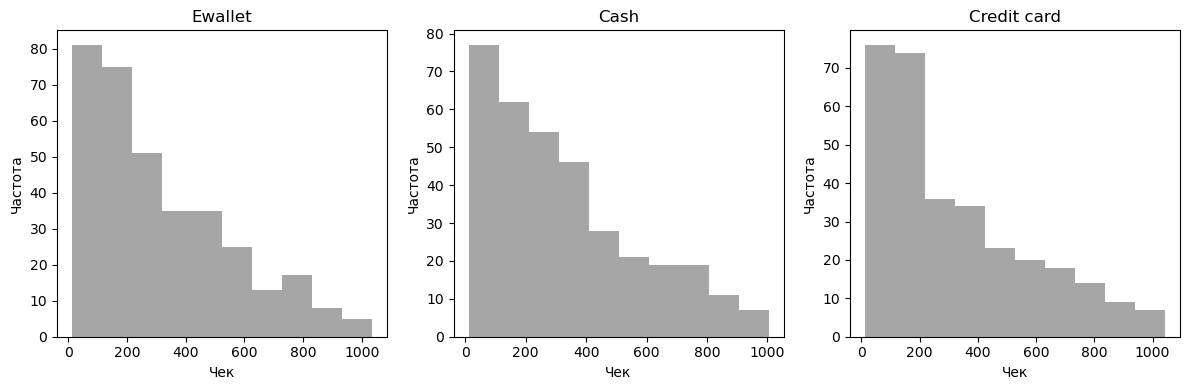

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
ewallet_data = df_3[df_3['Payment'] == 'Ewallet']['Total']
plt.hist(ewallet_data, color='grey', alpha=0.7, bins=10)
plt.xlabel('Чек')
plt.ylabel('Частота')
plt.title('Ewallet')

plt.subplot(1, 3, 2)
cash_data = df_3[df_3['Payment'] == 'Cash']['Total']
plt.hist(cash_data, color='grey', alpha=0.7, bins=10)
plt.xlabel('Чек')
plt.ylabel('Частота')
plt.title('Cash')

plt.subplot(1, 3, 3)
credit_card_data = df_3[df_3['Payment'] == 'Credit card']['Total']
plt.hist(credit_card_data, color='grey', alpha=0.7, bins=10)
plt.xlabel('Чек')
plt.ylabel('Частота')
plt.title('Credit card')

plt.tight_layout()
plt.show()

Визуально можно сказать, что средние чеки примерно равны у каждого способа оплаты, однако для доказательства этого предположения проведем тест ANOVA:

In [19]:
from scipy.stats import f_oneway

f"P-value для теста ANOVA = {f_oneway(ewallet_data, cash_data, credit_card_data).pvalue}"

'P-value для теста ANOVA = 0.9221037792354058'

Так как p-value > 0.05, мы не можем отбросить нулевую гипотезу, следовательно, наше предположение о том, что средние чеки покупателей равны вне зависимости от способа оплаты равны с точностью 95%.

# Заключение

В данной работе было сформулировано и проверено 3 гипотезы:

1. Средний чек мужчин равен среднему чек женщин
2. Средний чек покупателя с бонусной картой равен среднему чеку покупателя без бонусной карты
3. Средний чек покупателей, использующих разные способы оплаты, равны.

По результатам статистических тестов было выявлено, что:

1. Средний чек мужчин и женщин отличается
2. Средний чек покупателя с бонусной картой в среднем выше среднего чека покупателя, без бонусной карты
3. Средний чек покупателей равен не зависимо от способы оплаты